# Segunda instancia para el módulo de ciencia de datos aplicada a la cadena de suministros

### Diplomado de ciencia de datos
### Módulo: Supply chain
### Estudiante: Dennis Franco Contreras Sánchez

## 1) Explicar el codigo y los resultados de los siguientes temas:

## a) Crear el ejemplo de un IBP(planificación integrada de negocio) para una empresa

### Para este caso se hace el IBP para una industria cosmética brasilera localizada en la ciudad de Recife, se emplean los datos que están disponibles en la siguiente pagina web: http://oaji.net/articles/2015/1783-1426289410.pdf

### El proceso de planificación de ventas y operaciones S&OP (sales and operation plannig), en este proceso se toman 5 etapas

### 1. La gestion de productos y nuevas actividades, donde se revisan las nuevas actividades que tienen influencia en la demanda y el suministro.
### 2. La gestion de la demanda revisa los planes de demanda de todos los productos de la empresa y los factores que los sostienen (agrupados por familias y subfamilias).
### 3. La gestión de suministro para sostener el plan de nuevas actividades y el plan de demanda, se revisan las alternativas de materiales, capacidad de produccion, restricciones, flexibilidad, planes de mejora y patrones estacionales.
### 4. En la evaluación financiera se usan los planes desarrollados en los pasos anteriores, generando un plan integrado de negocio.
### 5. La revision mensual generará un conjunto único de planes integrados, una evaluación total de la planificación de negocio para los próximos 18-24 meses

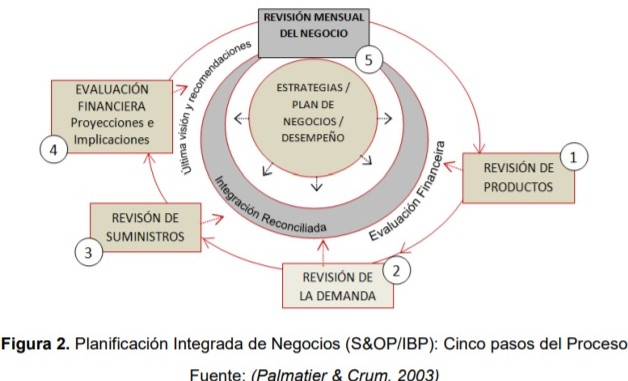

### Las acciones a realizarse son las siguientes:

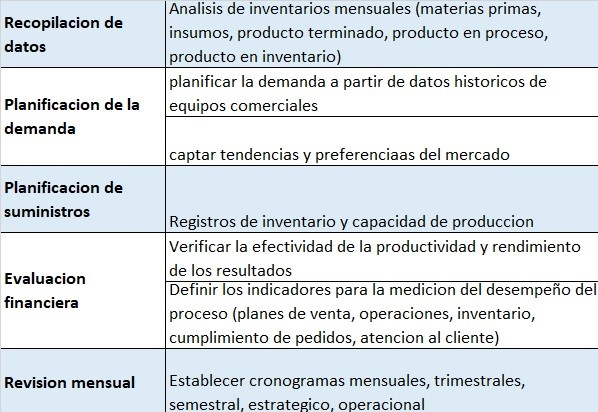

## b) Un ejemplo de MIP(mixed integrated prograrmming)

### En este caso se usarán los datos de las tablas 9 y 10 del ejemplo que se ilustra en el ejercicio 2 de esta tarea (Reciclar baterias)

In [1]:
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY

Using Python-MIP package version 1.6.6


In [10]:
# distancias del CRC (centro de recoleccion centralizado) a los puntos de recoleccion
#CenRec = ['CRC', 'IPC1', 'IPC2', 'IPC3', 'IPC4', 'IPC5']
#DistanceMatrix = [[0, 12, 7.8, 16.6, 15, 15.3],
 #                [0, 9.2, 7.6, 9, 17.5],
  #               [0, 10, 7.6, 9.2],
   #              [0, 3.6, 14.4],
    #             [0, 10.8],
     #            [0]]

In [2]:
# centros de recoleccion
CenRec = ['CRC', 'IPC1', 'IPC2', 'IPC3', 'IPC4', 'IPC5']
# distancias del CRC (centro de recoleccion centralizado) a los puntos de recoleccion
DistanceMatrix = [[10, 12, 7, 16, 15, 15],
                 [8, 9, 7, 9, 17],
                 [2, 10, 7, 9],
                 [20, 3, 14],
                 [33, 15],
                 []]

In [3]:

# numero de nodos y lista de vertices
n,V = len(DistanceMatrix),set(range(len(DistanceMatrix)))
# matriz de distancias
c = [[0 if i==j
     else DistanceMatrix[i][j-i-1] if j>i
     else DistanceMatrix[j][i-j-1]
     for j in V] for i in V]

model = Model()
# 
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
# 
y = [model.add_var() for i in V]
# 
model.objetive = minimize(xsum(c[i][j]*x[i][j] for i in V for j in V))
# Dejar cada punto una sola vez
for i in V:
    model += xsum(x[i][j] for j in V - {i}) == 1
# Llegar a cada punto solo una vez
for i in V:
    model += xsum(x[j][i] for j in V - {i}) == 1
for (i, j) in product(V - {0}, V - {0}):
    if i != j:
        model += y[i] - (n+1)*x[i][j] >= y[j]-n
# optimizar
model.optimize(max_seconds=40)
if model.num_solutions:
    out.write('route with total distance %g found: %s'
              % (model.objective_value, CenRec[0]))
    nc = 0
    while True:
        nc = [i for i in V if x[nc][i].x >= 0.99][0]
        out.write(' -> %s' % CenRec[nc])
        if nc == 0:
            break
    out.write('\n')
    

route with total distance 0 found: CRC -> IPC5 -> IPC1 -> IPC2 -> IPC3 -> IPC4 -> CRC


## c) Ejemplo de una simulación discreta

In [3]:
#!pip install simpy

  Using cached https://files.pythonhosted.org/packages/5a/64/8f0fc71400d41b6c2c6443d333a1cade458d23d4945ccda700c810ff6aae/simpy-3.0.11-py2.py3-none-any.whl


In [4]:
import numpy as np
import simpy
import matplotlib as plt

Inicio = True
Envase = False
Inyector = False
Tiemseg = 0
cont = 0
tim = 1
tim1 = 1

def Proceso(env, SPResources, spares):
    global tim1
    while Inicio == True:
        
        if tim1%3 == 0:
            Envase = True
            print('ingreso un envase')
        else:
            Envase = False
            print('No hay envase en la cinta')
        tim1 = tim1+1

        yield env.timeout(tim)#espera 1 segundos
        
        if(Envase == True):
            Inyector = True# inyecta el contenido en el envase
            print('llenando')
        else:
            Inyector = False# cierra la valvula
            print('cerrar valvula')
        tim1 = tim1+1
        yield env.timeout(tim)
                            

env = simpy.Environment()


SPResources = simpy.Resource(env, capacity = 2) # se emplean 2 recursos: los envases y la inyectora
spares = simpy.Container(env, init=0, capacity=20)

env.process(Proceso(env, SPResources, spares))

env.run(until = 35)

No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta
cerrar valvula
No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta
cerrar valvula
No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta
cerrar valvula
No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta
cerrar valvula
No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta
cerrar valvula
No hay envase en la cinta
cerrar valvula
ingreso un envase
llenando
No hay envase en la cinta


## d) Ejemplo de control de procesos

### se usa un dataframe de radiacion solar que se puede encontrar en:https://www.kaggle.com/dronio/SolarEnergy

In [5]:
from pyspc import *
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
import matplotlib.pyplot as plt

SolarTrain = pd.read_csv("SolarPredictionCopia.csv")     # carga los datos
SolarTrain = SolarTrain.sort_values(by = 'UNIXTime',ascending = True).reset_index(drop=True)     # reordena en funcion de UNIXTime
#SolarTrain.head(5)

fecha = SolarTrain['Data'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p'))
hora = SolarTrain['Time'].apply(lambda x:datetime.strptime(x,'%H:%M:%S'))
SolarTrain['fecha'] = fecha
SolarTrain['hora'] = hora

SolarTrain = SolarTrain.drop('Data',axis=1)
SolarTrain = SolarTrain.drop('Time',axis=1)

# visualizando datos de un solo dia (2016-09-01)

#cond1 = SolarTrain['fecha'] == '2016-09-01' 
cond1 = SolarTrain['fecha'].apply(lambda x: x.month) == 9
cond2 = SolarTrain['fecha'].apply(lambda x: x.day) == 1

u = SolarTrain.loc[cond1 & cond2,'fecha']
v = u.index[0]
ytr1 = SolarTrain.loc[cond1 & cond2,'Radiation']
xtr1 = SolarTrain.loc[cond1 & cond2,'fecha']
plt.plot(ytr1, color="blue")

In [6]:
vu = ytr1.rolling(9).mean()
vv = ytr1.rolling(21).mean()
vw = ytr1.rolling(15).mean()
vx = ytr1.rolling(15).mean().shift(-5, axis = 0)
vu.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    2.267778
9    2.211111
Name: Radiation, dtype: float64

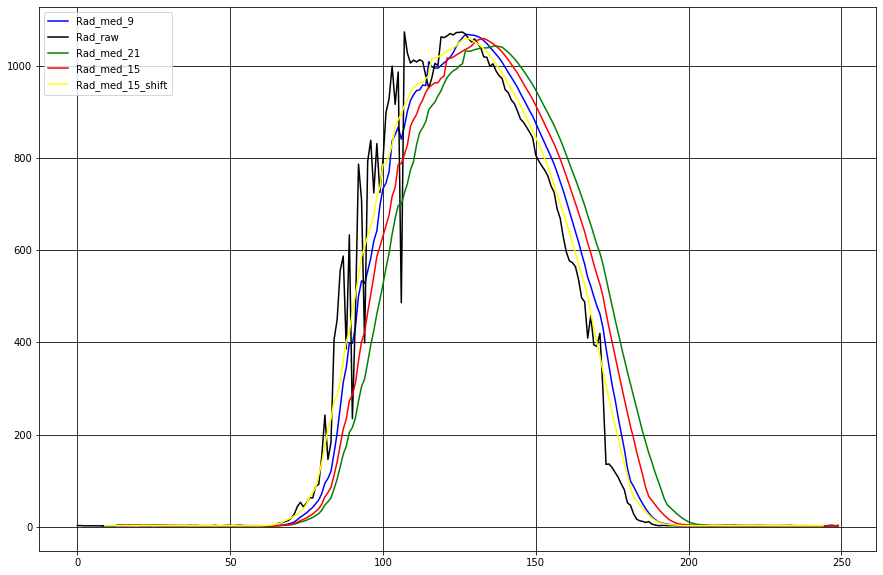

In [7]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(vu,label='Rad_med_9', color="blue")
plt.plot(ytr1,label='Rad_raw', color="black")
plt.plot(vv,label='Rad_med_21', color="green")
plt.plot(vw,label='Rad_med_15', color="red")
plt.plot(vx,label='Rad_med_15_shift', color="yellow")
plt.legend(loc=2)

### se toman el desplazamiento en 9 y 15, reconstruyendo la matriz:

In [8]:
DataRang = pd.DataFrame({'Radiation':ytr1,'Rad_med_9':vu,'shift15':vx})# forma un dataframe con las columnas
DataRang.info()
DataRang = DataRang.dropna()# quita las filas con nan
DataRang.info()
DataRang.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 3 columns):
Radiation    250 non-null float64
Rad_med_9    242 non-null float64
shift15      236 non-null float64
dtypes: float64(3)
memory usage: 7.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 9 to 244
Data columns (total 3 columns):
Radiation    236 non-null float64
Rad_med_9    236 non-null float64
shift15      236 non-null float64
dtypes: float64(3)
memory usage: 7.4 KB


,Radiation,Rad_med_9,shift15
9,2.07,2.211111,2.414667
10,2.10,2.130000,2.493333
11,2.40,2.156667,2.521333
12,2.06,2.140000,2.637333
13,3.55,2.284444,2.698667


In [9]:
DataMat = DataRang.to_numpy()# convierte el dataframe a matriz

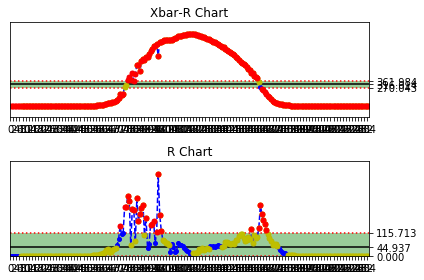

<pyspc: (124330130857)>


In [10]:
a = spc(DataMat) + xbar_rbar() + rbar() + rules()
print(a)

## 2) Una aplicación de ciencia de datos (algoritmo de AI) o algoritmos discutidos en el módulo Cadena de Suministros

### *El tema que se aborda trata de la producción de baterias plomo-acido automotivas e industriales en una fábrica ubicada al sud de la India, en la que no sólo se trata de producir baterias como producto final a partir de las materias primas (plástico, plomo, ácido sulfúrico, etc), sino también la logistica de como recuperar los productos despues de su uso (reciclaje, eliminación, reutilización, remanufacturación). Se utiliza un algoritmo genético para la logistica de recuperación de los productos usados. Este artículo puede ser encontrado en la siguiente página web:https://www.sciencedirect.com/science/article/pii/S0307904X0900170X*

## **a) Descripción del problema**

### *El problema que se aborda es construir un modelo de cadena de suministro inversa(de los consumidores hacia el productor) de múltiples niveles, múltiples periodos y múltiples productos para minimizar el costo total de adquisición, producción, distribución, inventario, recolección, eliminación, desensamblaje y costo de reciclaje en la recuperación de baterias usadas utilizando algoritmos genéticos.*

## b) Project Charter

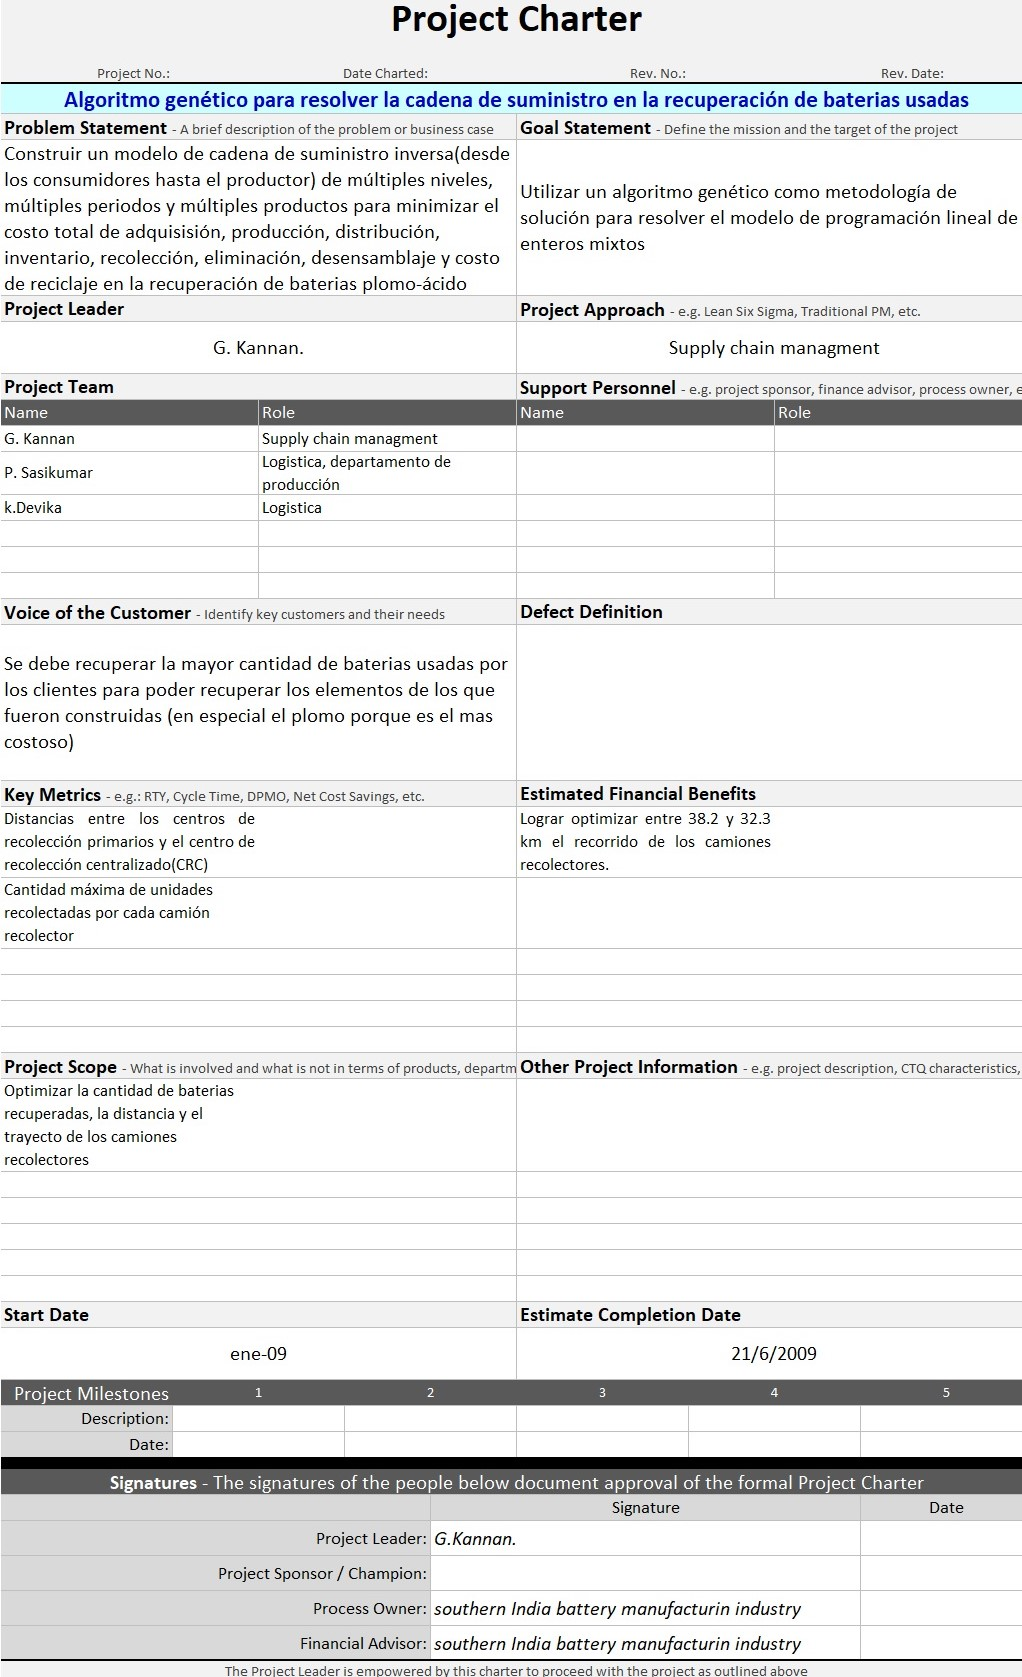

## c) Stakeholder Analysis

### Se identifican básicamente seis stakeholders, cuatro externos y uno interno:

####     *Clientes (poco poder, poco interes) (stakeholder externo)*
####     *Distribuidores (poco poder, mucho interes) (stakeholder externo)*
####     *Proveedores (poco poder, mucho interes) (stakeholder externo)*
####     *Gerencia (mucho poder, mucho interes) (stakeholder interno)*
####     *Socios inversionistas (mucho poder, poco interes) (stakeholder interno)*
####     *Sociedad medio ambiente (poco poder, mucho interes) (stakeholder externo)*

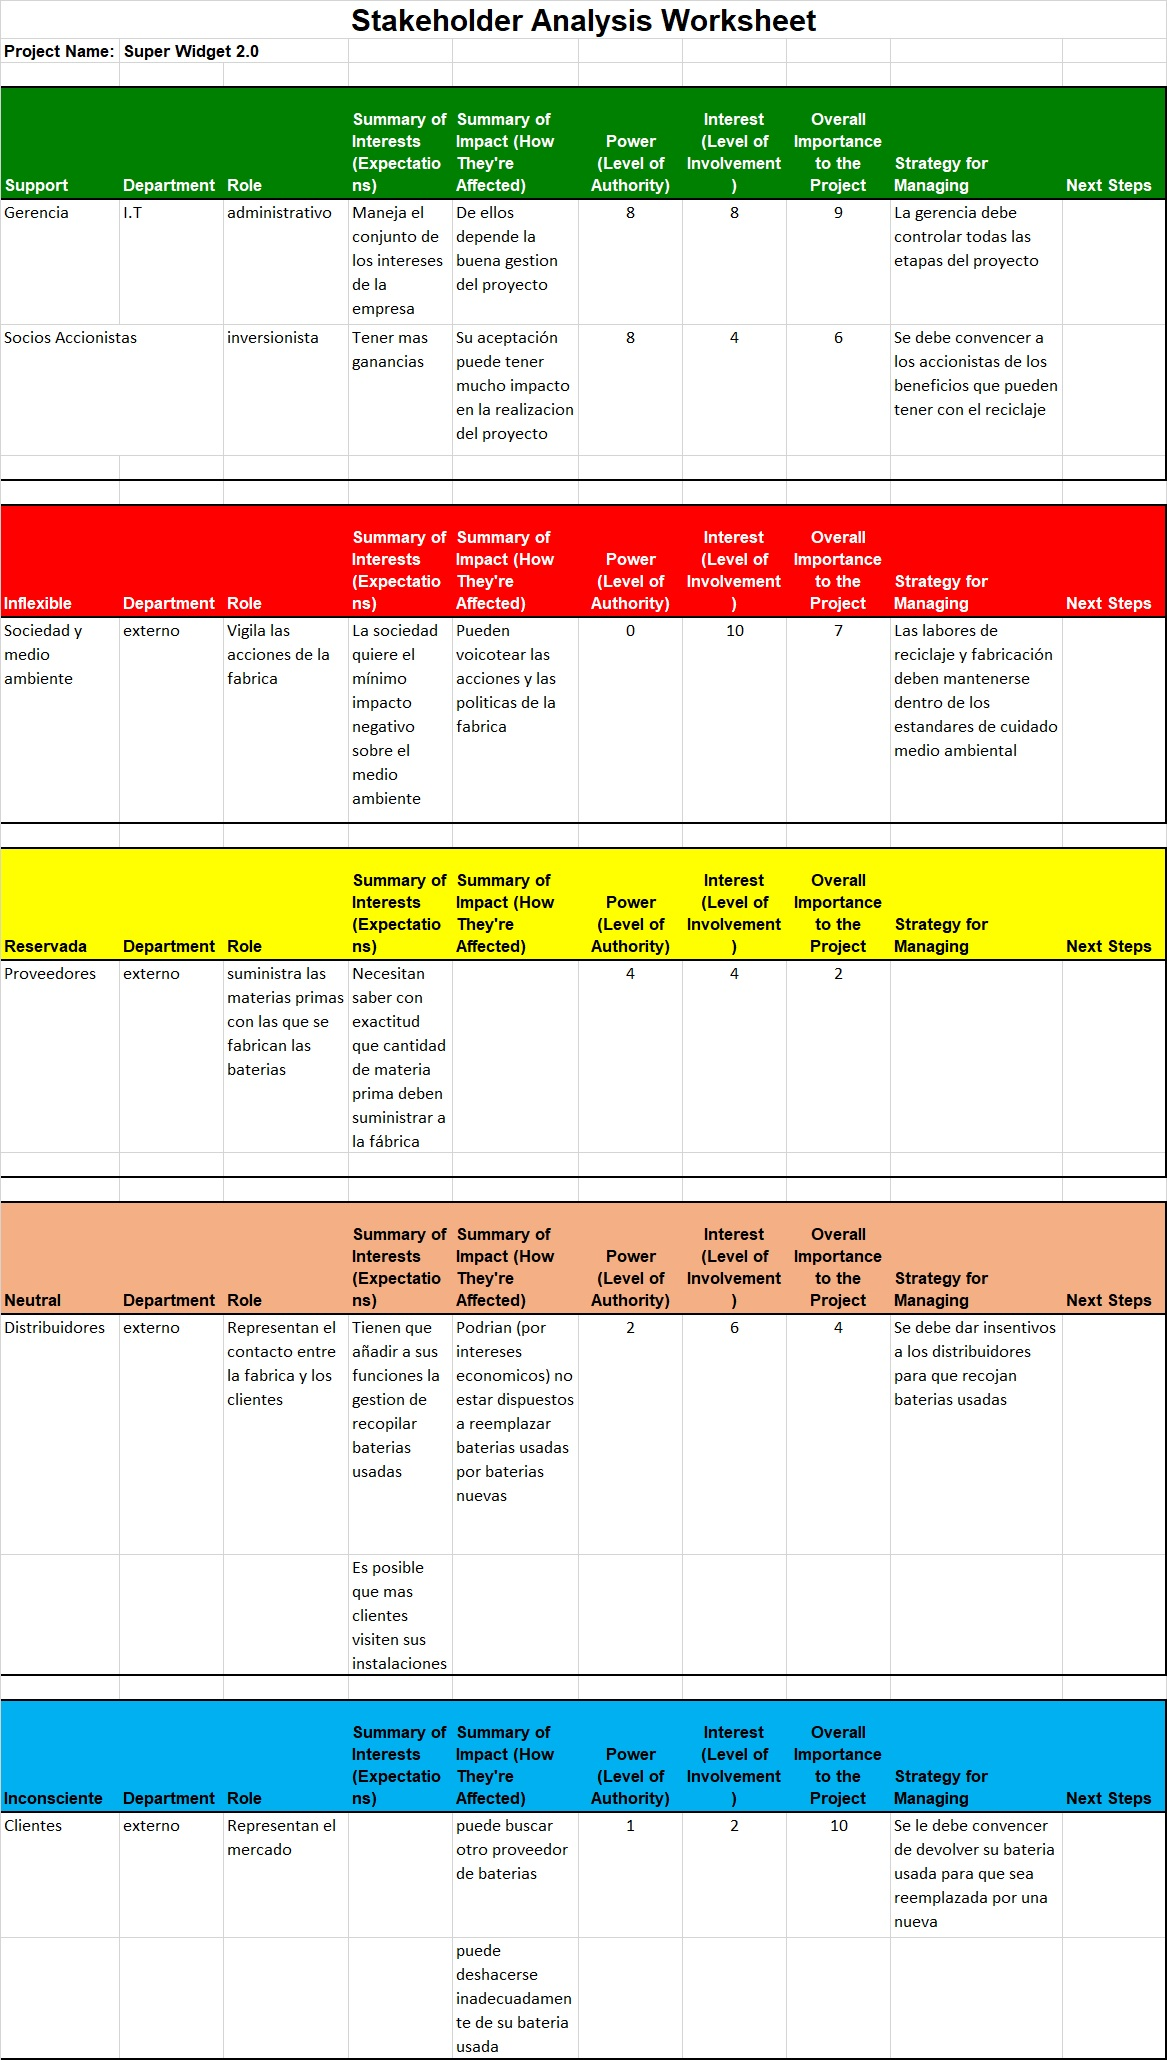

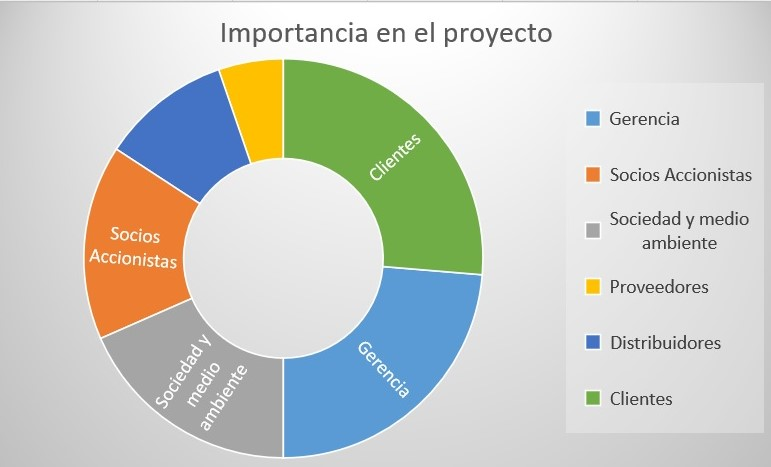

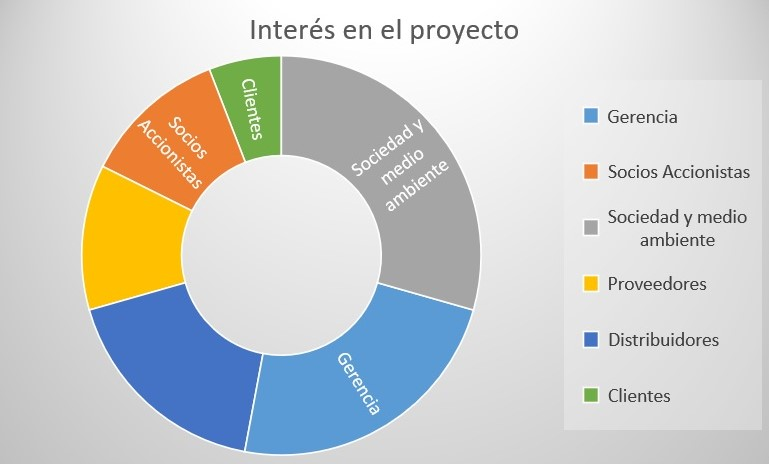

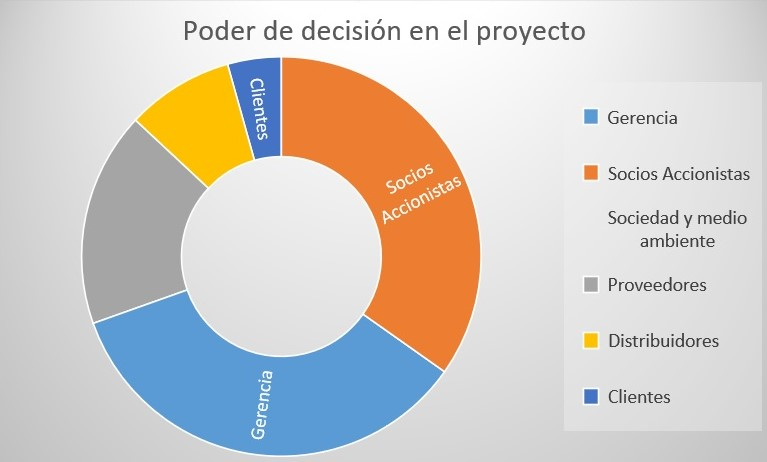

## d) Gantt Chart

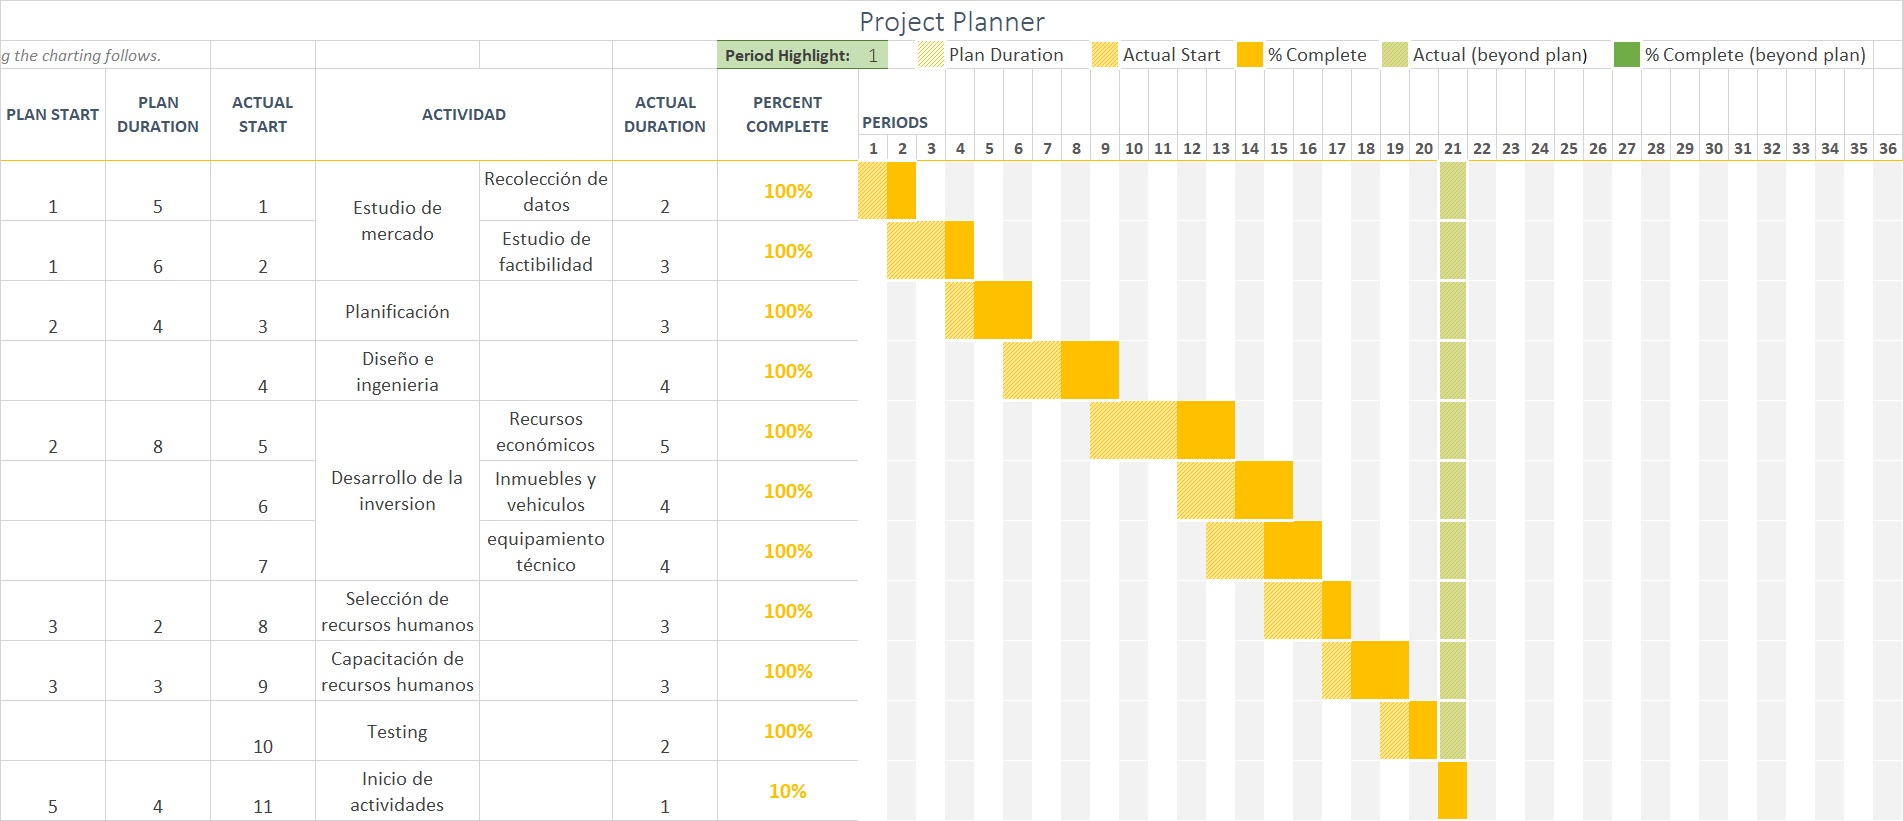

## e) Arquitectura de los datos y detalle de los datos

### Los datos a utilizarse para la creación y validación del modelo:

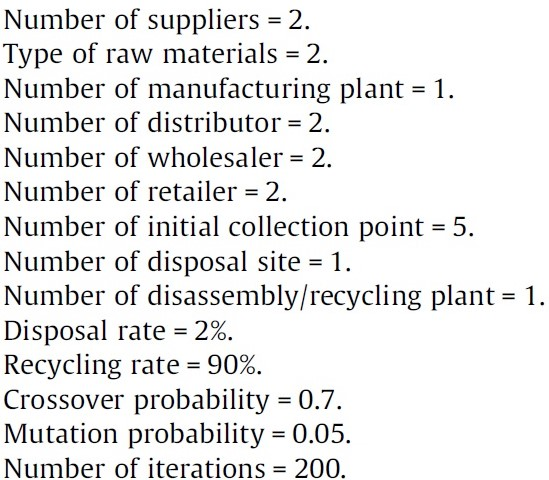

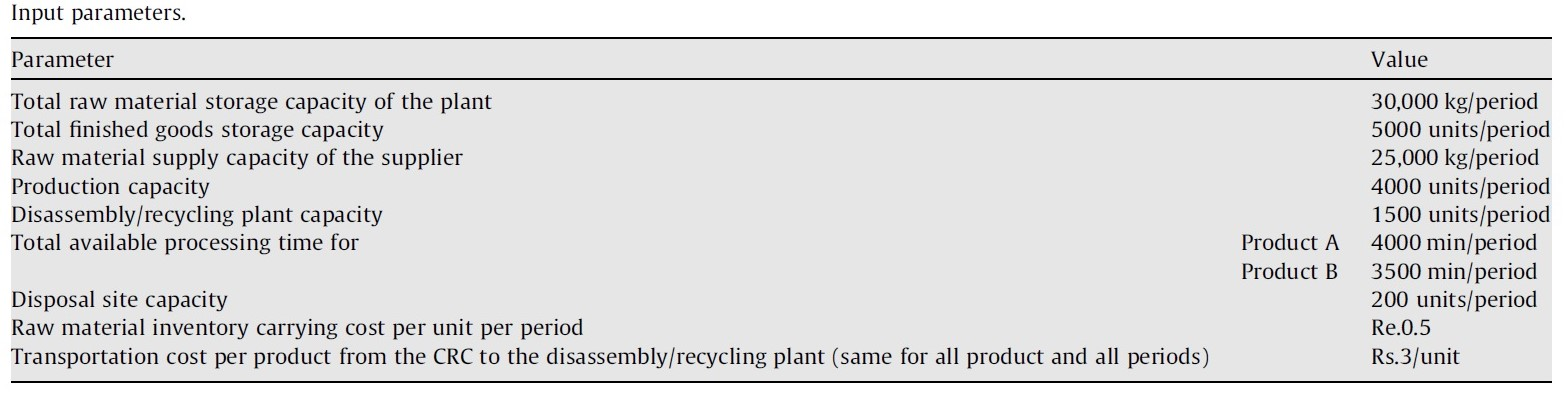

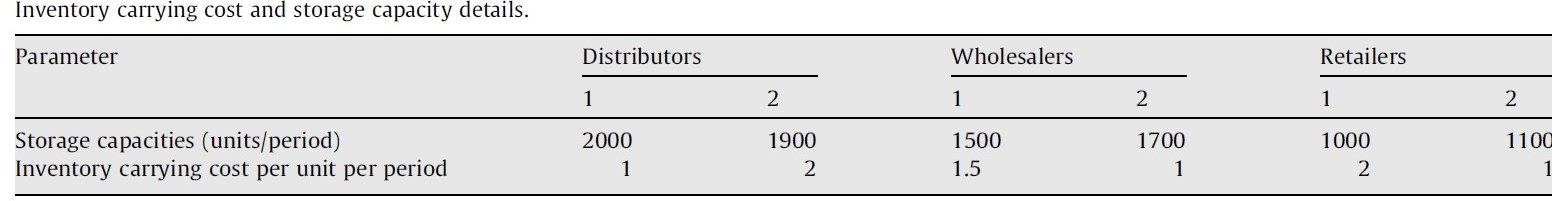

## f) Detalle del algoritmo

### *Se siguen los siguientes pasos en el algoritmo genético:*

### 1. INICIALIZACIÓN: Se genera una población inicial de forma randomica

### 2. EVALUACIÓN: Prueba a cada individuo de la población y calcula el valor de su estado físico.

### 3. SELECCIÓN DE PADRES: Se elije pares de individuos de la población tal que aquellos con mejores condiciones físicas obtengan más copias

### 4. REPRODUCCIÓN: Genera un individuo a partir de dos individuos padre.

### 5. MUTACIÓN: Cambia pequeñas cantidades de información por cada generación que pasa

### La compañia cuenta con dos camiones con una capacidad de recolección de 550 unidades cada uno, la compañia quiere optimizar el recorrido de los camiones recolectores desde cada punto de recolección al centro de recolección centralizado(CRC) para reducir los costos de transporte, teniendo en cuenta que los camiones deben trabajar al límite de su capacidad (550 unidades de carga)

### PASO 1: La matriz de distancias se calcula usando distancias euclidianas 

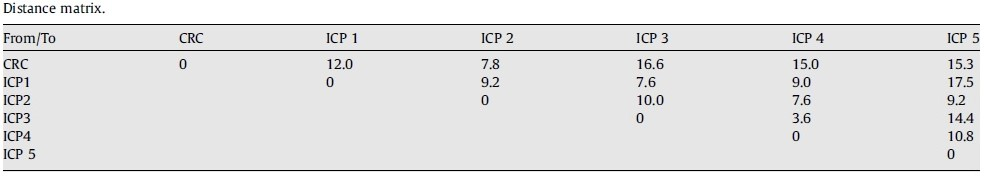

### PASO 2: Se usa un solo vehículo (en lugar de dos) para recoger las baterias de 2 puntos de recolección, con ello se optimiza la distancia de recorrido y a su vez se reduce el costo de transporte

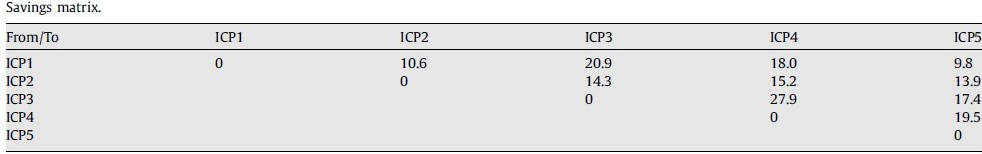

### PASO 3: Los ahorros se clasifican de mayor a menor, de este modo, en la matriz de ahorro mostrada en la figura anterior se obtiene ahorro de 27.9 al fusionar IPC3 e IPC4 con el mismo vehículo, del mismo modo, al fusionar IPC1 con IPC3 con el mismo vehículo se tiene un ahorro de 20.9

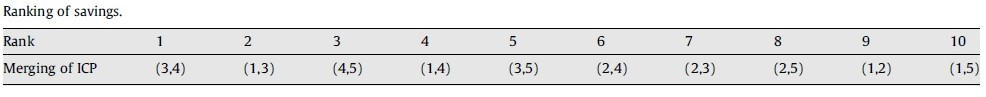

### PASO 4: Como los camiones deben operar al máximo de su capacidad (550 unidades), se fusionan (3,4), las unidades recogias son: 160 + 180 = 340 <550, entonces se fusiona al siguiente par (1,3) esto equivale: 160 + 180 + 190 = 530<550

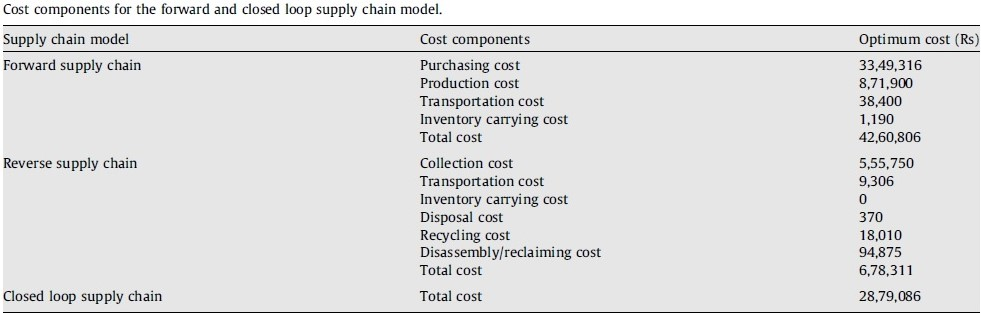